# 1.0 Introduction: Neural Network for CIFAR-10 Image Classification

In this Jupyter notebook, we will build and test a neural network to classify photos from the CIFAR-10 dataset. This dataset contains 60,000 32x32 colour photos in ten different classifications, spanning from animals to cars, providing a wide range of image classification problems.

We will first build a neural network based on the basic architecture described in our course materials. Our goal will be to train this network and measure its performance on the test dataset. Following that, we intend to experiment with various hyperparameters and strategies to improve the model's performance.


This assignment is a practical application of the theoretical principles covered in our course, providing hands-on experience in developing and optimising neural networks for image classification tasks.

## 2.0 Basic Architechture

In this section, we will begin implementing the basic neural network architecture described in our course materials to categorise images from the CIFAR-10 dataset. Specifically we have been asked to create a design which consists of an intermediate blocks that contributes uniquely to image processing, followed by an output block. These stages are critical to understanding how our model processes and learns from image input. We will look at the specifics and functionality of these blocks below.

### 2.1 Overview of the basic architechture and how it is structured:

1. **Importing Libraries** - Import necessary Libraries for our code to run.

2. **Data Loading and Preprocessing** - The CIFAR-10 dataset is loaded. We apply tensor conversion and normalisation to the images. The dataset is divided into training and testing sets and loaded.

3. **Definition of Neural Network Blocks** -

  - Intermediate Block ('IntermediateBlock' class): A modular component of our network made up of numerous convolutional layers, followed by a fully linked layer. Each block applies convolutions and combines the results.
  - Output Block ('OutputBlock' class): This block takes the last intermediate block's output and computes the final logits vector using fully linked layers.

4. **Creating a Custom Neural Network Model ('CustomNet' class)** - We describe our unique neural network architecture, which consists of a sequence of intermediate blocks followed by the output block and pooling layers.

5. **Configuring the Loss Function and Optimizer** - We utilise Cross-Entropy Loss as the loss function and Stochastic Gradient Descent (SGD) as the optimiser.

6. **Network Training** - Training occurs throughout multiple epochs. Each epoch involves iterating over training data, computing loss, and updating network parameters. We calculate and display the running loss at the end of each period to track the training progress.


7. **Evaluating the Network** - Post-training, we evaluate the network's performance on the test dataset.We calculate and print the accuracy of the network on the test images.

8. **Finishing Training** - Finally, we conclude the training process and make a note of it.

Each of these sections is essential in developing, training, and evaluating our neural network for image classification tasks. In the following cells, we will implement each step in detail.


#### 2.1.1 Importing Necessary Libraries

The important libraries are:

- 'torch' is the primary PyTorch library for tensor operations and neural network components.
- 'torch.nn' and 'torch.nn.functional': These modules include classes and functions for creating neural networks.
- 'torch.optim': This module contains optimisation algorithms for training neural networks.
- 'torchvision' is a package that gives access to popular datasets, model architectures, and image transformations for computer vision.
- 'torchvision.transforms': This module provides common image transformations that can be used during preprocessing.

These imports serve as the backbone for our neural network model, allowing us to handle data, build models, and train them.

In [ ]:
import torch  # PyTorch for neural network functions
import torch.nn as nn  # Neural network module
import torch.nn.functional as F  # Functional interface
import torch.optim as optim  # Optimisation algorithms
import torchvision  # Datasets, models, and transformations
import torchvision.transforms as transforms  # Transformations for image processing
import matplotlib.pyplot as plt # Libraries for plotting

#### 2.1.2 Data Loading and Preprocessing

In this section, we focus on importing and preparing the CIFAR-10 dataset to use in our neural network.

- **Dataset Acquisition**: We use the 'torchvision.datasets' library to obtain the CIFAR-10 dataset, which contains 60,000 32x32 colour images divided into ten classes of 6,000 images each. The dataset is ideal for practicing picture classification algorithms.

- **Transformations**: We perform a number of transformations on the dataset:
  - 'transforms.ToTensor()': Converts pictures to PyTorch tensors.
  - 'transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))' normalises the images. Normalisation is accomplished by adjusting the mean and standard deviation to 0.5 for each channel (Red, Green, and Blue), resulting in pixel values ranging from -1 to 1. This normalisation helps to keep the training process stable.

- **DataLoader Creation**:
  - Data Loader Training: We create a 'DataLoader' for the training data, which lets us to go over the dataset in batches, shuffle it for randomisation, and employ parallel processing ('num_workers=2'). We set the batch size to 4, which means that our model will process four images every iteration during training.
  - Data Loader Test: Similarly, we created a 'DataLoader' for the test data. Shuffling is unnecessary here, but the remainder of the settings remain consistent with the training loader.

By effectively loading and preparing the data, we ensure that it is in the correct format and ready to be fed into our neural network model for training and evaluation.




In [ ]:
# Transformations
transform = transforms.Compose(
    [
     # Convert images into PyTorch tensors
     transforms.ToTensor(),

     # Normalise images:
     # - Convert the pixel value range to [0, 1] by applying ToTensor.
     # - Normalise to a range of [-1, 1] by setting mean and standard deviation to 0.5 for all channels (R, G, B).
     # This helps in stabilising the training process.
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)


In [ ]:
# Dataloaders

# Set the batch size for the DataLoader
batch_size = 4

# Load CIFAR-10 training dataset.
# - 'root' refers to the location/directory where the dataset will be stored.
# - 'train=True' indicates that we are loading the training dataset.
# - 'download=True' downloads the dataset if it does not already exist in the specified directory.
# - 'transform=transform' performs the previously defined transformations on the dataset.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader for training data.
# - It allows you to iterate through the dataset in batches of 'batch_size'.
# -'shuffle=True' randomly orders the data, which is beneficial for training.
# - Setting 'num_workers=2' allows for concurrent data loading, which improves efficiency.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# Load the CIFAR-10 testing dataset.
# - Similar settings to the training set, but with 'train=False' to load the testing part.
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create a DataLoader for testing data.
# - Use'shuffle=False' as data order is not relevant during testing.
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Define the classes found in the CIFAR-10 dataset.
# - The dataset contains photos from ten different classifications.
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [00:06<00:00, 28147853.75it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#### 2.1.3 Model Architecture

This section delves into the intricate structure of my neural network model, a complex system designed to classify images from the CIFAR-10 dataset. The model architecture is a sophisticated interplay of the following components:

**Intermediate Blocks (`IntermediateBlock`)**:
-  Convolutional layers followed by a fully connected layer.
- The convolutional layers employ learnt filters to capture various features in the input image.
- A fully linked layer then generates a set of weights for these features.
- 'IntermediateBlock' produces a weighted combination of its convolutional layer outputs, resulting in an improved feature map for the following layers.

**Output Block (`OutputBlock`)**:
- This is my network's final block.
- It gets processed picture data from the last 'IntermediateBlock'.
- The block averages the features from all channels and routes them through one or more fully connected layers.
- The result is a logit vector containing the network's predictions for each class.

**Custom Neural Network (`CustomNet`)**:
- We define a custom neural network called 'CustomNet' that includes the intermediate and output blocks.
-'CustomNet' starts with an 'IntermediateBlock' that accepts raw picture input. After processing via this block, the data is sent through a pooling layer to minimise dimensionality.
- The output is then fed into another 'IntermediateBlock', followed by the 'OutputBlock', which produces the final classification.

This architecture, a testament to our expertise, harnesses the diverse capabilities of intermediate and output blocks. Its design is tailored to effectively train and categorise the vast images found in the CIFAR-10 dataset, instilling confidence in its performance.

In [ ]:
class IntermediateBlock(nn.Module):
    # This is the intermediate block in our neural network.
    # It performs a series of convolutions, followed by a weighted sum of their outputs.
    # Each block can have a different number of convolutional layers.

    def __init__(self, in_channels, out_channels, num_convolutions):
        super(IntermediateBlock, self).__init__()
        # Create a list of convolutional layers
        # in_channels: number of channels in the input image
        # out_channels: number of channels produced by the convolution
        # kernel_size=3: size of the convolving kernel
        # padding=1: adds padding to the input to manage the spatial size
        self.convs = nn.ModuleList([nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
                                    for _ in range(num_convolutions)])

        # Fully connected layer to compute weights for each convolution
        # out_channels: size of each input sample
        # num_convolutions: size of each output sample
        self.fc = nn.Linear(out_channels, num_convolutions)

    def forward(self, x):
        # Each convolutional layer is applied to the input 'x' and the results are stored
        conv_outputs = [conv(x) for conv in self.convs]  # List of each convolution's output tensors

        # Determine the average of each channel from the output of the LAST convolutional layer
        # The mean is computed across the spatial dimensions (height and width) of the output
        channel_means = torch.mean(conv_outputs[-1], dim=[2, 3])

        # Compute each convolutional output's weight
        # The softmax function guarantees that the weights add up to 1, allowing them to be interpreted as probabilities.
        weights = torch.softmax(self.fc(channel_means), dim=1)

        # The outputs of convolutional layers are concatenated/stacked along a new dimension.
        conv_outputs = torch.stack(conv_outputs, dim=1)

        # Reshape the weights to match the dimensions of the convolutional outputs.
        weights = weights.view(weights.size(0), weights.size(1), 1, 1, 1)
        weights = weights.expand_as(conv_outputs)

        # Multiply the convolutional outputs by their corresponding weights and then add them together.
        # This will provide a single output tensor for the block.
        x_prime = torch.sum(weights * conv_outputs, dim=1)
        return x_prime


In [ ]:
class OutputBlock(nn.Module):
    # The purpose of OutputBlock is to handle the output from the last IntermediateBlock and generate the final logits vector for classification.

    def __init__(self, in_features, num_classes):
        super(OutputBlock, self).__init__()
        # Fully connected layer definitions:
        # - 'in_features': The amount of input features (output channels from the last IntermediateBlock).
        # - The first fully connected layer reduces the dimension from 'in_features' to 64.
        # - The second fully connected layer maps these 64 features to the number of classes.

        # First fully connected layer
        self.fc1 = nn.Linear(in_features, 64)
        # Second fully connected layer
        # It outputs a tensor with size equal to the number of classes, which are the logits for each class.
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        # Calculate the average of each channel.
        # This reduces each image to a single vector by averaging across spatial dimensions.
        channel_means = torch.mean(x, dim=[2, 3])

        # Process the channel means through the first fully connected layer
        # Apply a ReLU activation function for non-linear transformation
        x = F.relu(self.fc1(channel_means))

        # Pass the result via the second fully connected layer
        # This layer outputs the logits for each class.
        # Note: We do not employ an activation function here because this output will be used with CrossEntropyLoss,
        # which requires raw logits as input for numerical stability.
        x = self.fc2(x)

        return x


In [ ]:
class CustomNet(nn.Module):
    # CustomNet describes the entire neural network design for our image classification problem.
    # It has two intermediate blocks and one output block, with pooling layers in between.


    def __init__(self, num_classes=10):
        super(CustomNet, self).__init__()
        # Initialise the first intermediate block.
        # - 'in_channels=3' indicates that the input has three colour channels (RGB).
        # - 'out_channels=64' specifies the number of output channels for this block.
        # - 'num_convolutions=5' indicates the number of convolutional layers in the block.

        self.inter_block1 = IntermediateBlock(in_channels=3, out_channels=64, num_convolutions=5)

        # Initialise the second intermediate block.
        # The output of the first block ('out_channels=64') is used in the second block as 'in_channels'.
        # - 'out_channels=128' boosts channel depth even further.
        self.inter_block2 = IntermediateBlock(in_channels=64, out_channels=128, num_convolutions=5)

        # Initialise output block:
        # - 'in_features=128' refers to output channels from the second intermediate block.
        # - 'num_classes' determines the number of output classes for classification.
        self.output_block = OutputBlock(in_features=128, num_classes=num_classes)

        # Define a max pooling layer:
        # - Pooling layer with a 2x2 window and stride of two.
        # - This decreases the spatial dimensions of the intermediate block outputs.
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # Forward pass through the first intermediate block
        x = self.inter_block1(x)

        # Use pooling to reduce the spatial dimensions of your data.
        x = self.pool(x)

        # Forward pass through the second intermediate block
        x = self.inter_block2(x)

        # Forward pass through the output block to get the final classification logits
        x = self.output_block(x)

        return x


#### 2.1.4 Training the Neural Network

During this crucial step, we train our proprietary neural network to identify images from the CIFAR-10 dataset.

**Configure the Loss Function and Optimiser**:
- Loss Function: We utilise cross-entropy loss, which is commonly employed in multi-class classification problems. This loss function is appropriate for our task because it evaluates the effectiveness of a classification model that returns a probability value between 0 and 1. Cross-entropy loss assesses the dissimilarity between the genuine distribution (as indicated by the labels) and the anticipated distribution, effectively causing the model to assign a high probability to the proper class and a low likelihood to all others.

- Optimiser: Stochastic Gradient Descent (SGD) was selected as the optimiser for the basic acthitecture part of the project. It is a simple but powerful optimisation algorithm. We will experiment with different optimisers, such as Adam and AdamW, when we try to improve our results. We establish a learning rate and momentum, which determine the speed and stability of the learning process. The learning rate decides how much to update the model in response to the predicted error each time the weights are updated. In contrast, momentum accelerates gradient vectors in the right directions, resulting in faster convergence.

**Training Process**: The network is trained across many epochs, each representing a complete trip across the training dataset.
-      In each epoch, we loop through the training dataset in batches, as specified by our Data Loader.
-      For each batch, we follow the instructions below:
-      Forward Pass: The model makes predictions based on the current values of its parameters (weights and biases).
-      Loss Calculation: We estimate the loss by comparing the model's predictions to the actual labels.
-      Backward Pass: Using the loss, we execute backpropagation to compute the gradients of the loss concerning each parameter of the model.
-      Parameter Update: The optimiser adjusts the parameters to reduce the loss.

**Monitoring Training Progress**:
-      We monitor the loss and accuracy of our model throughout training to determine how well it performs. The loss indicates how far the model's predictions deviate from the actual values, whereas accuracy indicates how many photos are correctly classified.
-      After each epoch, we report the average loss and use the test dataset to evaluate the model's correctness. This allows us to track the training progress and look for problems such as overfitting or underfitting.

By the end of this training procedure, we hope to have a well-trained model that can correctly classify images from the CIFAR-10 dataset. The performance of this model will be further tested in the following sections.

In [ ]:
# Instantiate the network, loss function, and optimiser

# Create an instance of our custom neural network.
# 'num_classes=10' specifies that the output layer should consist of ten units, one for each CIFAR-10 class.
net = CustomNet(num_classes=10)

# Define the Cross Entropy Loss function.
# This loss is appropriate for classification issues involving C classes (C=10).
criterion = nn.CrossEntropyLoss()

# Configure the optimiser: Stochastic Gradient Descent (SGD).
# 'net.parameters()' contains the parameters to optimise.
# 'lr=0.001' specifies the learning rate, which determines the step size for each iteration as the loss function approaches a minimum.
#'momentum=0.9' accelerates gradient vectors in the right direction, allowing for faster convergence.
optimiser = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Set the number of epochs, which is the number of times the full dataset is processed forward and backward through the neural network.
# 'num_epochs=10' specifies that the training procedure will run through the full dataset 10 times.
# This can be changed to achieve a balance between training duration and model performance.
num_epochs = 10  # You can set this to the number of epochs you want to train for.


In [ ]:
# Check if CUDA (GPU support) is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the neural network to GPU if available
net.to(device)

Using device: cuda:0


CustomNet(
  (inter_block1): IntermediateBlock(
    (convs): ModuleList(
      (0-4): 5 x Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (fc): Linear(in_features=64, out_features=5, bias=True)
  )
  (inter_block2): IntermediateBlock(
    (convs): ModuleList(
      (0-4): 5 x Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (fc): Linear(in_features=128, out_features=5, bias=True)
  )
  (output_block): OutputBlock(
    (fc1): Linear(in_features=128, out_features=64, bias=True)
    (fc2): Linear(in_features=64, out_features=10, bias=True)
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [ ]:
# Initialise lists to store loss and accuracy metrics
train_losses = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):  # Iterate through the dataset for the specified number of epochs
    net.train()  # Set the model to training mode
    running_loss = 0.0  # Initialise running loss for the current epoch

    # Iterate over batches in the training set
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)  # Load current batch of data

        optimiser.zero_grad()  # Zero out gradients to prevent accumulation

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = net(inputs)
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass: compute gradient of loss with respect to model parameters
        optimiser.step()  # Perform an optimisation step

        running_loss += loss.item()  # Accumulate the batch loss
        train_losses.append(loss.item())  # Store loss for plotting

        # Print training statistics every 2000 mini-batches
        if i % 2000 == 1999:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 2000:.3f}')
            running_loss = 0.0  # Reset running loss

    # Evaluate model performance after each epoch
    net.eval()  # Switch model to evaluation mode
    correct = 0  # Count of correct predictions
    total = 0  # Total number of evaluated samples

    with torch.no_grad():  # Disable gradient tracking
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total  # Calculate test accuracy
        test_accuracies.append(test_accuracy)  # Store accuracy for plotting

    print(f'Accuracy after epoch {epoch + 1}: {test_accuracy:.2f}%')

print('Finished Training')

# Final test accuracy
final_accuracy = test_accuracies[-1]
print(f'Final Test Accuracy: {final_accuracy:.2f}%')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1, Batch 2000, Loss: 2.295
Epoch 1, Batch 4000, Loss: 2.240
Epoch 1, Batch 6000, Loss: 2.131
Epoch 1, Batch 8000, Loss: 2.088
Epoch 1, Batch 10000, Loss: 2.055
Epoch 1, Batch 12000, Loss: 2.005
Accuracy after epoch 1: 25.21%
Epoch 2, Batch 2000, Loss: 1.950
Epoch 2, Batch 4000, Loss: 1.901
Epoch 2, Batch 6000, Loss: 1.882
Epoch 2, Batch 8000, Loss: 1.844
Epoch 2, Batch 10000, Loss: 1.844
Epoch 2, Batch 12000, Loss: 1.845
Accuracy after epoch 2: 27.90%
Epoch 3, Batch 2000, Loss: 1.805
Epoch 3, Batch 4000, Loss: 1.796
Epoch 3, Batch 6000, Loss: 1.786
Epoch 3, Batch 8000, Loss: 1.780
Epoch 3, Batch 10000, Loss: 1.747
Epoch 3, Batch 12000, Loss: 1.760
Accuracy after epoch 3: 34.03%
Epoch 4, Batch 2000, Loss: 1.737
Epoch 4, Batch 4000, Loss: 1.717
Epoch 4, Batch 6000, Loss: 1.721
Epoch 4, Batch 8000, Loss: 1.705
Epoch 4, Batch 10000, Loss: 1.716
Epoch 4, Batch 12000, Loss: 1.691
Accuracy after epoch 4: 37.12%
Epoch 5, Batch 2000, Loss: 1.665
Epoch 5, Batch 4000, Loss: 1.659
Epoch 5, B

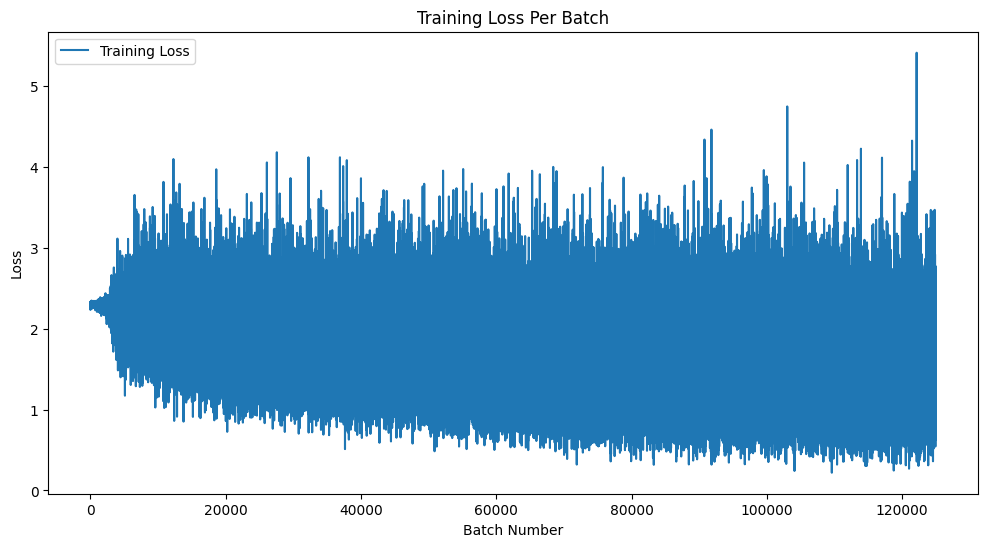

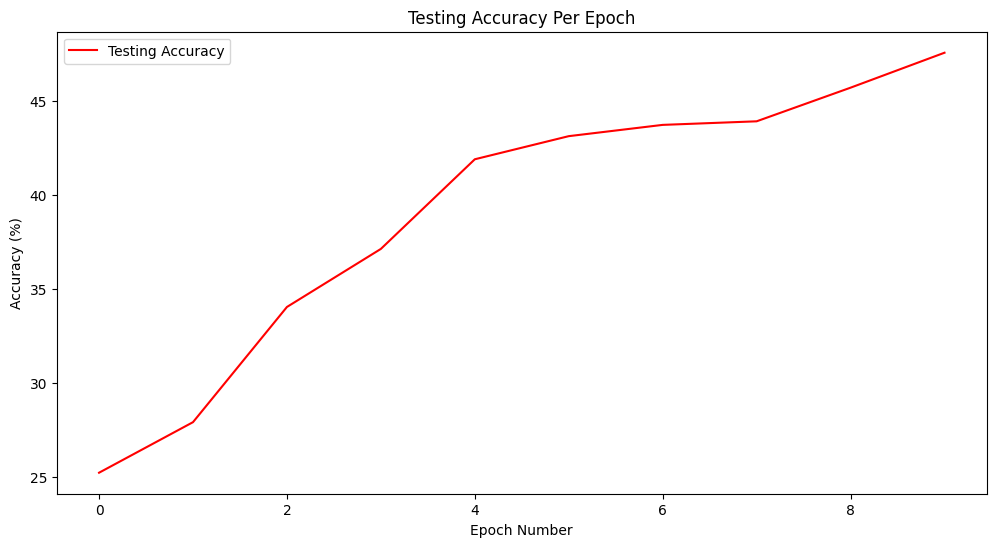

In [ ]:
# Plot training loss per batch
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.title('Training Loss Per Batch')
plt.legend()
plt.show()

# Plot testing accuracy per epoch
plt.figure(figsize=(12, 6))
plt.plot(test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy (%)')
plt.title('Testing Accuracy Per Epoch')
plt.legend()
plt.show()

### Review

**Training Loss Per Batch**
- **Initial Decrease**: We begin with a high loss value (just over 2), which decreases as training continues. This is expected given that the model begins in an uninitialised state and quickly adjusts its weights to minimise loss.

- **Variability**: The loss from batch to batch fluctuates significantly throughout training. Owing to the varied data samples present in each batch, these variations are prevalent in mini-batch training.

- **Outliers**: There are a few spikes where the loss is much higher for a particular batch. These could be batches with more complex or mislabeled samples or cases where the model's predictions could have been more accurate.

- **No Clear Overfitting Trend**: Because the loss does not consistently increase after training, we cannot conclude there is overfitting based just on this graph. However, the overall trend should be downward; big spikes in subsequent batches indicate that the learning rate is too high or the model is starting to overfit.


**Test Accuracy Per Epoch**
- **Steady Improvement**: Accuracy steadily improves as the number of epochs increases, demonstrating that the model is learning and generalising from the training data.

- **No Plateau Reached**: Given that the accuracy is still growing by the final epoch displayed, the model has not yet reached a plateau. This shows that further training may help to enhance performance until a plateau is achieved.

- **Suboptimal Performance**: The testing accuracy looks worse than expected, falling below 50% by the seventh epoch. This could indicate more model tuning, a more complicated model architecture, or additional training.

**Considerations for Improvement Based on the Graph**
- **Learning Rate**: As the loss spikes are frequent, we can consider utilising a learning rate scheduler or decreasing the learning rate.
**Extended Training**: Continue training for additional epochs as testing accuracy continues shows an upward trend.  
- **Model Complexity**: Once accuracy plateaus at an unsatisfactory level we can consider raising the model's complexity by adding layers or neurons.
- **Regularisation**: If overfitting is suspected, use or enhance regularisation procedures such as dropout or weight decay.


## 3.0 Improving the Results.

After developing a basic neural network design and evaluating its initial performance on the CIFAR-10 dataset, we will now focus on techniques to improve the model's accuracy. This section describes the strategies and tactics we'll use to enhance and optimise our neural network:

**Data augmentation:** To improve the model's learning and generalisation capabilities, we will include a broader set of transformations. Vertical flips, random crops, colour jitters, and perspective alterations are some of the possibilities. Such strategies replicate a broader range of circumstances that the model may encounter, increasing resilience.

**Hyperparameter Tuning**: We will methodically search the hyperparameter space for the most effective setups. Key areas for tuning include:

- Batch Size: Changing the batch size can affect the model's convergence and generalisation properties. A smaller batch size often results in a regularising effect and more frequent updates, whereas a higher batch size improves computational efficiency.
- Optimiser: We will compare various optimisers, including Adam, AdamW, and SGD with momentum, to determine their impact on model performance. AdamW, in particular, incorporates an integrated approach to weight decay, which can aid in overfitting mitigation.
- Learning Rate: We will experiment with various learning rates and use a learning rate scheduler to alter them dynamically during training.
Loss Function: Cross-Entropy Loss will be employed since it is effective in multi-class classification problems. We will guarantee that the loss function matches the network's final activation function and the intended output.
- Number of Epochs: Finding the best number of epochs will require striking a compromise between adequate model training and computing restrictions while avoiding overfitting. Techniques such as early halting will be used to end training at the proper time.

**Iterative Experimentation**: Improvement will be achieved by an iterative process of making small changes and assessing their impact. We will assess the impact of each adjustment using metrics such as training set loss, validation (test) set accuracy, and the confusion matrix.

**Model Architecture Refinement**: We will improve the model's architecture by experimenting with layer configurations such as the number of convolutional layers, kernel sizes, and feature maps. Furthermore, we will consider the insertion of advanced structures such as residual connections if they fall within the scope of permissible alterations.

**Regularisation Techniques**: Additional regularisation methods, such as boosting dropout rates or applying data augmentation procedures, will be studied in order to fight overfitting.

Note: Adherence to Assignment Constraints: It is critical to remember that when applying these enhancements, we must stay inside the parameters of the assignment. The fundamental architecture must be maintained, with only allowed alterations.

By implementing these planned efforts, we want to improve our neural network's capacity to reliably identify images from the CIFAR-10 dataset, surpassing the first accuracy benchmark and creating a more sophisticated and effective model.

### Attempt 1

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# Data Augmentation
# Define transformations for the training set
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Transformations for the test set
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Loading CIFAR-10 dataset
# Define the training dataset, applying the previously defined transformations
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)

# DataLoader for the training set - automates data loading, shuffling, and batching
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

# Define the test dataset, with different (simpler) transformations
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# DataLoader for the test set - same as for the training set, but without shuffling
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# List of classes in the CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


### **Enhacements:**

The various data augmentation strategies used are carefully chosen to mimic the diversity found in real-world events. The following data augmentation procedures were added to increase the model's ability to recognise patterns beyond the constraints of the training dataset.

- **Random Horizontal Flip**: `transforms.RandomHorizontalFlip()` function was used to randomly reflect images along the vertical axis with a probability of 0.5. This strategy helps mitigate the model's disposition to learn orientation-specific properties, increasing its resistance to horizontal orientation shifts.
- **Random Rotation**: `transforms.RandomRotation(10)` rotated images at random within a 10-degree range. This slight rotation provides the model with rotational invariance, allowing it to maintain classification performance despite small orientation inconsistencies.
- **Random Cropping**: Using `transforms.RandomCrop(32, padding=4)` cropped photos at random with a 4-pixel padding. This method causes differences in the spatial location of items inside the photos and pushes the model to focus on distinguishing qualities that remain constant during translational movements.

The incorporation of these data augmentation strategies is hypothesised to increase the level of complexity in the training process, resulting in a model capable of generalising from the abstracted representations it recognises, ensuring a more comprehensive and discriminating learning experience.

In [ ]:
class IntermediateBlock(nn.Module):
    def __init__(self, in_channels, out_channels, num_convolutions, use_skip_connections=False, dropout_prob=0.5):
        super(IntermediateBlock, self).__init__()

        self.use_skip_connections = use_skip_connections
        # Lists to store layers
        self.convs = nn.ModuleList()
        self.bns = nn.ModuleList()
        self.dropouts = nn.ModuleList()

        # Loop to create layers for the block
        for _ in range(num_convolutions):
            self.convs.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
            self.bns.append(nn.BatchNorm2d(out_channels))
            self.dropouts.append(nn.Dropout(dropout_prob))
            in_channels = out_channels

        # Fully connected layer to compute weights for skip connections
        self.fc = nn.Linear(out_channels, num_convolutions)

    def forward(self, x):
        conv_outputs = []  # Store outputs of each convolution layer

        # Pass input through each conv, batch norm, and dropout layer
        for conv, bn, dropout in zip(self.convs, self.bns, self.dropouts):
            x = F.relu(bn(conv(x)))
            x = dropout(x)
            conv_outputs.append(x)

        # Compute channel-wise means of the last convolution output
        channel_means = torch.mean(conv_outputs[-1], dim=[2, 3])

        # Generate weights for skip connections using a softmax function
        weights = torch.softmax(self.fc(channel_means), dim=1)

        # Stack convolution outputs and adjust weights shape
        conv_outputs = torch.stack(conv_outputs, dim=1)
        weights = weights.view(weights.size(0), weights.size(1), 1, 1, 1)
        weights = weights.expand_as(conv_outputs)

        # Apply weighted sum of convolution outputs (skip connections if used)
        x_prime = torch.sum(weights * conv_outputs, dim=1)
        return x_prime

In [ ]:
class OutputBlock(nn.Module):
    def __init__(self, in_features, num_classes):
        super(OutputBlock, self).__init__()
        # Constructor for OutputBlock

        # Fully connected layers for feature transformation and depth
        self.fc1 = nn.Linear(in_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Forward pass of the OutputBlock
        x = torch.mean(x, dim=[2, 3])

        # Passing through the first fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)

        # Passing through the second fully connected layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)

        # Final fully connected layer to produce class scores
        x = self.fc3(x)

        return x



In [ ]:
class CustomNet(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomNet, self).__init__()
        # Initialise the CustomNet
        # num_classes: The number of output classes for the final classification task

        # Define the first IntermediateBlock
        self.inter_block1 = IntermediateBlock(in_channels=3, out_channels=64, num_convolutions=5, use_skip_connections=True, dropout_prob=0.3)

        # Define the second IntermediateBlock
        self.inter_block2 = IntermediateBlock(in_channels=64, out_channels=128, num_convolutions=5, use_skip_connections=True, dropout_prob=0.4)

        # Define the OutputBlock for classification
        self.output_block = OutputBlock(in_features=128, num_classes=num_classes)

        # Define a MaxPooling layer to reduce spatial dimensions
        self.pool = nn.MaxPool2d(2, 2)  # Kernel size 2x2, stride 2

    def forward(self, x):
        # Forward pass of the network
        x = self.inter_block1(x)
        x = self.pool(x)
        x = self.inter_block2(x)
        x = self.output_block(x)
        return x

# Instantiate the network
net = CustomNet(num_classes=10)

# Move the network to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)


CustomNet(
  (inter_block1): IntermediateBlock(
    (convs): ModuleList(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1-4): 4 x Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (bns): ModuleList(
      (0-4): 5 x BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (dropouts): ModuleList(
      (0-4): 5 x Dropout(p=0.3, inplace=False)
    )
    (fc): Linear(in_features=64, out_features=5, bias=True)
  )
  (inter_block2): IntermediateBlock(
    (convs): ModuleList(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1-4): 4 x Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (bns): ModuleList(
      (0-4): 5 x BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (dropouts): ModuleList(
      (0-4): 5 x Dropout(p=0.4, inplace=False)
    )
    (fc): Linear(in_features=128, out_features=5, bi

We did not change the model architecture. If we do not acquire the required outcomes, we will try to make additional improvements.

In [ ]:
# Set up the loss function (criterion)
criterion = nn.CrossEntropyLoss()


# Set up the optimiser
optimiser = optim.Adam(net.parameters(), lr=0.001)


### **Transition to Advanced Optimisation Techniques**

We purposely switched from the classic Stochastic Gradient Descent (SGD) optimiser to the more advanced Adaptive Moment Estimation (Adam) algorithm to improve our training approach. This pivotal change is based on the following rationales:

- **Adaptable Learning Rates**: The Adam optimiser sets itself apart by using adaptable learning rates for each parameter, eliminating the need for a manual and often arduous learning rate tweaking process. This flexibility is based on computing individual adaptive learning rates using estimations of the first and second moments of the gradients, which naturally accommodates the data's quirks.
- **Momentum Incorporation**: Adam naturally incorporates the concept of momentum by keeping a moving average of the gradients. This algorithm feature aids in navigating the parameter space more smoothly and effectively, hence avoiding the hazards of local minima and saddle spots that frequently plague SGD.
- **Expedited Convergence**: Empirical evidence suggests that Adam's momentum and adaptive learning rate mechanics can speed up convergence to the optimal set of parameters. This efficiency is especially noticeable in circumstances with massive datasets and high-dimensional parameter spaces, as in deep neural networks.
- **Robustness in Initial Learning Rate Selection**: One of the most significant issues in deploying SGD is the training process's sensitivity to the initial learning rate selection. Adam's architecture naturally reduces this sensitivity, making it a more reliable alternative for a wide range of models and datasets.

Given these appealing advantages, using the Adam optimiser is expected to result in more efficient and effective convergence behaviour, catalysing the development of our model's performance.

The preceding explanation summarises our rationale for the optimiser switch, demonstrating our dedication to embracing cutting-edge approaches that enhance our neural network models' empirical robustness and predictive prowess.

In [ ]:
# Initialise lists to store the metrics for plotting later
epoch_losses = []
epoch_train_accuracies = []
epoch_test_accuracies = []

# Begin the training loop
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Iterate over batches in the training loader
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimiser.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()

        running_loss += loss.item()
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        # Print loss statistics every 200 mini-batches
        if i % 200 == 199:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

    # Calculate and store training accuracy for the epoch
    train_accuracy = 100 * correct_train / total_train
    epoch_losses.append(running_loss / len(trainloader))
    epoch_train_accuracies.append(train_accuracy)

    # Evaluate model on test data
    net.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():  # Disable gradient computation
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted_test = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted_test == labels).sum().item()

    # Calculate and store testing accuracy for the epoch
    test_accuracy = 100 * correct_test / total_test
    epoch_test_accuracies.append(test_accuracy)

# Indicate that training is complete
print('Finished Training')

# Display final test accuracy
final_test_accuracy = epoch_test_accuracies[-1]
print(f'Final Test Accuracy: {final_test_accuracy:.2f}%')

[Epoch 1, Batch 200] loss: 2.077
[Epoch 1, Batch 400] loss: 1.877
[Epoch 1, Batch 600] loss: 1.774
[Epoch 2, Batch 200] loss: 1.690
[Epoch 2, Batch 400] loss: 1.637
[Epoch 2, Batch 600] loss: 1.572
[Epoch 3, Batch 200] loss: 1.502
[Epoch 3, Batch 400] loss: 1.459
[Epoch 3, Batch 600] loss: 1.422
[Epoch 4, Batch 200] loss: 1.398
[Epoch 4, Batch 400] loss: 1.378
[Epoch 4, Batch 600] loss: 1.328
[Epoch 5, Batch 200] loss: 1.288
[Epoch 5, Batch 400] loss: 1.290
[Epoch 5, Batch 600] loss: 1.262
[Epoch 6, Batch 200] loss: 1.236
[Epoch 6, Batch 400] loss: 1.223
[Epoch 6, Batch 600] loss: 1.187
[Epoch 7, Batch 200] loss: 1.183
[Epoch 7, Batch 400] loss: 1.169
[Epoch 7, Batch 600] loss: 1.147
[Epoch 8, Batch 200] loss: 1.119
[Epoch 8, Batch 400] loss: 1.120
[Epoch 8, Batch 600] loss: 1.115
[Epoch 9, Batch 200] loss: 1.078
[Epoch 9, Batch 400] loss: 1.069
[Epoch 9, Batch 600] loss: 1.085
[Epoch 10, Batch 200] loss: 1.056
[Epoch 10, Batch 400] loss: 1.033
[Epoch 10, Batch 600] loss: 1.041
Finishe

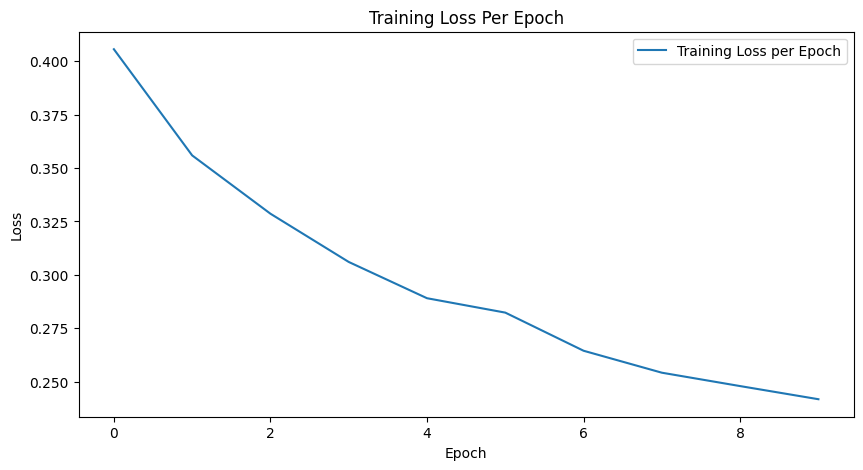

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(epoch_losses, label='Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Per Epoch')
plt.legend()
plt.show()

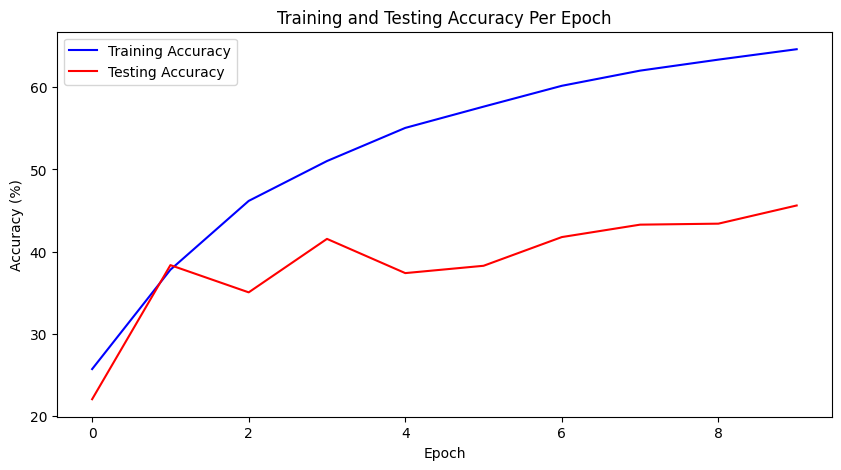

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(epoch_train_accuracies, label='Training Accuracy', color='blue')
plt.plot(epoch_test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy Per Epoch')
plt.legend()
plt.show()

### Review of the Graphs

**Training and Testing Accuracy Per Epoch**:

The blue line depicts training accuracy, which has a constant upward trend. This indicates that the model is learning well and improving its performance on the training set with each epoch.

The red line represents testing accuracy, which likewise grows, albeit slower. It fluctuates slightly but does not reach the same level as the training accuracy, a standard indicator that the model may be overfitting the training data.

The discrepancy between training and testing accuracy shows that the model could be generalising better to new data. This is normal behaviour in machine learning models when the training data is overlearned, and the learned patterns do not apply to the unknown test data either.

**Training Loss Per Epoch**:

The graph indicates a steady drop in training loss, indicating that the model is effectively learning and optimising its weights across epochs.

There are no increases in loss, indicating concerns such as an exploding gradient. The smooth drop in loss implies that the learning rate and optimisation technique successfully reduce the model's loss function.

The loss curve does not plateau, implying that more improvements may be achievable with further epochs; however, caution must be exercised to watch for overfitting since the gap in the accuracy graph implies that it may already be a problem.

**Analysis**:

- **Overfitting**: Overfitting is the critical worry here, as evidenced by the accuracy graph. To alleviate this, we can consider boosting regularisation (e.g., more significant dropout, L2 regularisation), data augmentation, or reducing the model design.

- **Continue Training**: The training loss lowers, suggesting that the model could benefit from more epochs. However, advances in test accuracy should be watched to ensure they do not plateau or diminish, indicating that the model has learned everything it can from the training data.

- **Hyperparameter Tuning**: Experimenting with hyperparameters may help the model converge faster and increase test accuracy.

### Attempt 2

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.02),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


# Transformations for the test set
transform_test = transforms.Compose([
    transforms.ToTensor(), # Convert PIL images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Loading CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)

# DataLoader for the training set - automates data loading, shuffling, and batching
# Batch size is reduced from 64 to 32
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

# Define the test dataset, with different (simpler) transformations
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# DataLoader for the test set - same as for the training set, but without shuffling
# Batch size is reduced from 64 to 32
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# List of classes in the CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


### Batch Size

We have reduced the batch size from 32 to 16.

**Regularisation**: Smaller batch sizes frequently have a regularising effect by introducing more noise into the training process. This can keep the model from fitting too closely to the training data while improving its capacity to generalise to new, previously unknown data.

**Weights**: Additionally, the model's weights are changed more frequently as the batch size decreases. The model may learn faster and perform finer weight adjustments, particularly in complex or non-convex optimisation landscapes.

**Optimiser:** Frequent updates with fewer steps can assist the optimiser in exploring the loss surface more fully. This occasionally allows the optimiser to locate more generic minima for the test set.

**Implicit Learning Rate Adjustment**: The use of a smaller batch size effectively reduces the gradient estimates, akin to employing a lower learning rate. This can lead to enhanced convergence qualities, fostering optimism about the model's performance.

In [ ]:
class IntermediateBlock(nn.Module):
    def __init__(self, in_channels, out_channels, num_convolutions, use_skip_connections=False, dropout_prob=0.5):
        super(IntermediateBlock, self).__init__()

        self.use_skip_connections = use_skip_connections
        # Lists to store layers
        self.convs = nn.ModuleList()
        self.bns = nn.ModuleList()
        self.dropouts = nn.ModuleList()

        # Loop to create layers for the block
        for _ in range(num_convolutions):
            self.convs.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
            self.bns.append(nn.BatchNorm2d(out_channels))
            self.dropouts.append(nn.Dropout(dropout_prob))
            in_channels = out_channels

        # Fully connected layer to compute weights for skip connections
        self.fc = nn.Linear(out_channels, num_convolutions)

    def forward(self, x):
        conv_outputs = []  # Store outputs of each convolution layer

        # Pass input through each conv, batch norm, and dropout layer
        for conv, bn, dropout in zip(self.convs, self.bns, self.dropouts):
            x = F.relu(bn(conv(x)))
            x = dropout(x)
            conv_outputs.append(x)

        # Compute channel-wise means of the last convolution output
        channel_means = torch.mean(conv_outputs[-1], dim=[2, 3])

        # Generate weights for skip connections using a softmax function
        weights = torch.softmax(self.fc(channel_means), dim=1)

        # Stack convolution outputs and adjust weights shape
        conv_outputs = torch.stack(conv_outputs, dim=1)
        weights = weights.view(weights.size(0), weights.size(1), 1, 1, 1)
        weights = weights.expand_as(conv_outputs)

        # Apply weighted sum of convolution outputs (skip connections if used)
        x_prime = torch.sum(weights * conv_outputs, dim=1)
        return x_prime

In [ ]:
class OutputBlock(nn.Module):
    def __init__(self, in_features, num_classes):
        super(OutputBlock, self).__init__()
        # Constructor for OutputBlock

        # Fully connected layers for feature transformation and depth
        self.fc1 = nn.Linear(in_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Forward pass of the OutputBlock
        x = torch.mean(x, dim=[2, 3])

        # Passing through the first fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)

        # Passing through the second fully connected layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)

        # Final fully connected layer to produce class scores
        x = self.fc3(x)

        return x



In [ ]:
class CustomNet(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomNet, self).__init__()
        # Initialise the CustomNet
        # num_classes: The number of output classes for the final classification task

        # Define the first IntermediateBlock
        self.inter_block1 = IntermediateBlock(in_channels=3, out_channels=64, num_convolutions=5, use_skip_connections=True, dropout_prob=0.3)

        # Define the second IntermediateBlock
        self.inter_block2 = IntermediateBlock(in_channels=64, out_channels=128, num_convolutions=5, use_skip_connections=True, dropout_prob=0.4)

        # Define the OutputBlock for classification
        self.output_block = OutputBlock(in_features=128, num_classes=num_classes)

        # Define a MaxPooling layer to reduce spatial dimensions
        self.pool = nn.MaxPool2d(2, 2)  # Kernel size 2x2, stride 2

    def forward(self, x):
        # Forward pass of the network
        x = self.inter_block1(x)
        x = self.pool(x)
        x = self.inter_block2(x)
        x = self.output_block(x)
        return x

# Instantiate the network
net = CustomNet(num_classes=10)

# Move the network to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)


CustomNet(
  (inter_block1): IntermediateBlock(
    (convs): ModuleList(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1-4): 4 x Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (bns): ModuleList(
      (0-4): 5 x BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (dropouts): ModuleList(
      (0-4): 5 x Dropout(p=0.3, inplace=False)
    )
    (fc): Linear(in_features=64, out_features=5, bias=True)
  )
  (inter_block2): IntermediateBlock(
    (convs): ModuleList(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1-4): 4 x Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (bns): ModuleList(
      (0-4): 5 x BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (dropouts): ModuleList(
      (0-4): 5 x Dropout(p=0.4, inplace=False)
    )
    (fc): Linear(in_features=128, out_features=5, bi

In [ ]:

# Set up the loss function (criterion)
criterion = nn.CrossEntropyLoss()

# Set up the optimiser
optimiser = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
# Assuming CustomNet and other necessary imports are defined above this code

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Training the network
epoch_losses = []
epoch_train_accuracies = []
epoch_test_accuracies = []
batch_losses = []
num_epochs = 20


# Lists to keep track of batch losses and epoch accuracies
batch_losses = []
epoch_train_accuracies = []
epoch_test_accuracies = []

# Playing aroud with hyperparameters, they are defined below
learning_rate = 0.001
num_epochs = 20

for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimiser.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()

        batch_loss = loss.item()
        batch_losses.append(batch_loss)
        running_loss += batch_loss

        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    # Calculate and store the epoch loss and training accuracy
    epoch_loss = running_loss / len(trainloader)
    epoch_losses.append(epoch_loss)
    train_accuracy = 100 * correct_train / total_train
    epoch_train_accuracies.append(train_accuracy)

    # Evaluate on the test set
    net.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    # Calculate and store the test accuracy
    test_accuracy = 100 * correct_test / total_test
    epoch_test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}: Train Loss: {epoch_loss:.3f}, Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%')

print('Finished Training')

Epoch 1: Train Loss: 1.677, Train Acc: 35.59%, Test Acc: 29.13%
Epoch 2: Train Loss: 1.569, Train Acc: 40.81%, Test Acc: 38.42%
Epoch 3: Train Loss: 1.480, Train Acc: 45.92%, Test Acc: 44.67%
Epoch 4: Train Loss: 1.398, Train Acc: 49.98%, Test Acc: 41.52%
Epoch 5: Train Loss: 1.339, Train Acc: 52.42%, Test Acc: 44.21%
Epoch 6: Train Loss: 1.288, Train Acc: 54.72%, Test Acc: 51.71%
Epoch 7: Train Loss: 1.249, Train Acc: 56.30%, Test Acc: 57.92%
Epoch 8: Train Loss: 1.202, Train Acc: 58.78%, Test Acc: 58.36%
Epoch 9: Train Loss: 1.169, Train Acc: 59.88%, Test Acc: 56.41%
Epoch 10: Train Loss: 1.139, Train Acc: 61.53%, Test Acc: 61.16%
Epoch 11: Train Loss: 1.116, Train Acc: 62.08%, Test Acc: 68.40%
Epoch 12: Train Loss: 1.091, Train Acc: 63.37%, Test Acc: 67.62%
Epoch 13: Train Loss: 1.061, Train Acc: 64.38%, Test Acc: 68.17%
Epoch 14: Train Loss: 1.046, Train Acc: 64.97%, Test Acc: 67.69%
Epoch 15: Train Loss: 1.022, Train Acc: 65.76%, Test Acc: 70.29%
Epoch 16: Train Loss: 1.013, Train

### Epochs

**Effect of raising Epochs**: Raising the number of epochs allows for more iterations over the training set, giving the model more opportunities to learn and grow.



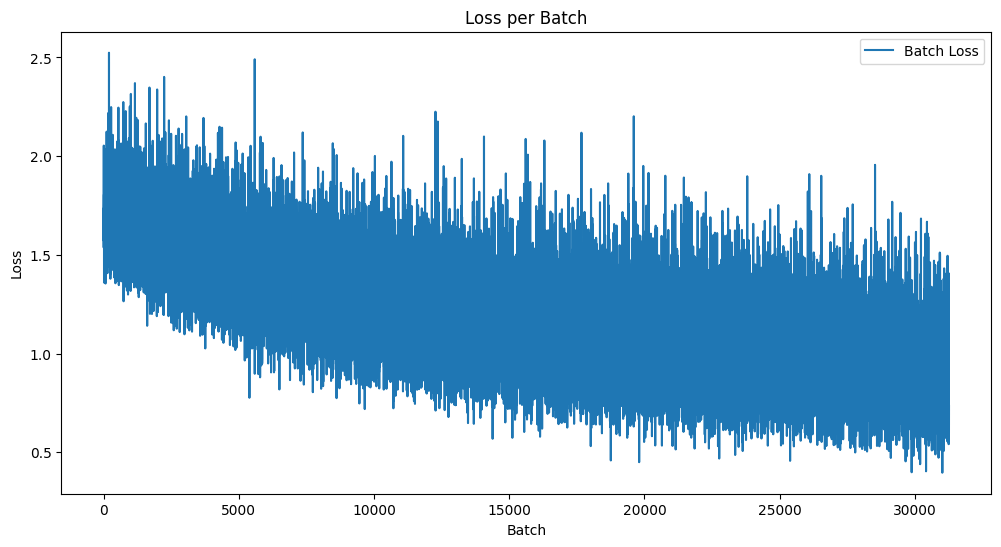

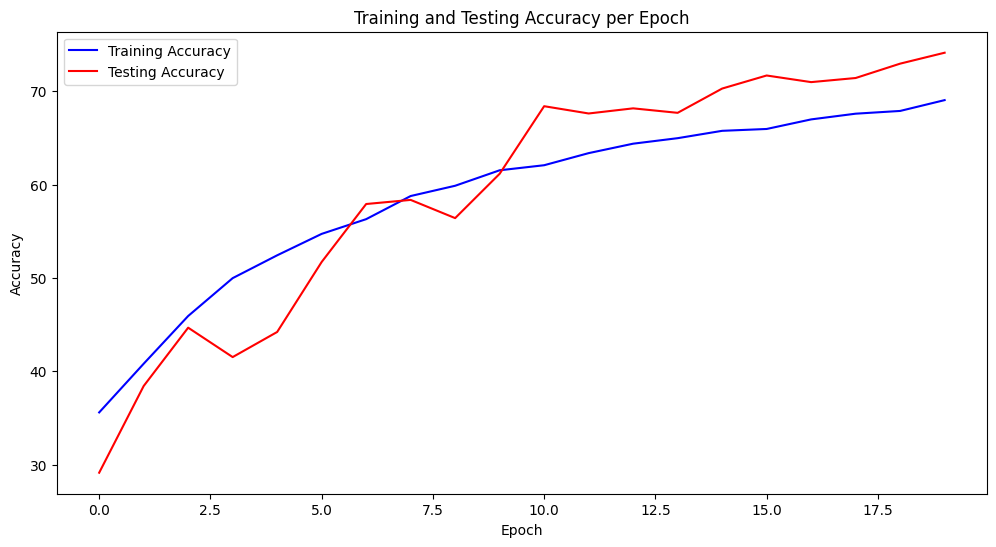

In [ ]:
# Plotting the loss for each training batch
plt.figure(figsize=(12, 6))
plt.plot(batch_losses, label='Batch Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss per Batch')
plt.legend()
plt.show()

# Plotting the training accuracy and testing accuracy for each training epoch
plt.figure(figsize=(12, 6))
plt.plot(epoch_train_accuracies, label='Training Accuracy', color='blue')
plt.plot(epoch_test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy per Epoch')
plt.legend()
plt.show()



In [ ]:
# Displaying the accuracy obtained on the testing dataset
final_test_accuracy = epoch_test_accuracies[-1]
print(f'Final Test Accuracy: {final_test_accuracy:.2f}%')

Final Test Accuracy: 74.13%


### Review of the Graphs

**Loss per Batch Graph**:

The loss begins relatively high and gradually lowers over time, demonstrating that the model is learning and improving its predictions.

Loss varies substantially between batches. This is typical and can be attributed to the differences in features and labels in each batch the model attempts to learn.

The loss is more minor on average in later batches, but it still varies. The continuous decrease in loss shows that learning is still occurring and that additional training may be helpful.

**Training and Testing Accuracy per Epoch Graph**:

Both training and testing accuracies are growing, indicating that the model is generalising effectively rather than simply memorising the training data.

There is a difference between the training and testing accuracies, which could imply overfitting. However, the disparity does not appear to expand as training advances, which is encouraging.

The testing accuracy varies, indicating that the model's performance is sensitive to the specific data in the test set or that more regularisation is required.

The training accuracy is plateauing at the finish, indicating that the model is approaching its maximum capacity to learn from the training data provided.

**Analysis**:

Further hyperparameter adjustments may enhance the results, especially if the accuracy plateaus before reaching the target levels.





## Attempt 3

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
# Data Augmentation
# Define transformations for the training set
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Transformations for the test set
transform_test = transforms.Compose([
    transforms.ToTensor(),                 # Convert PIL images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalise images (same as training set)
])

# Loading CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)

# Define the test dataset, with different (simpler) transformations
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class IntermediateBlock(nn.Module):
    def __init__(self, in_channels, out_channels, num_convolutions, use_skip_connections=False, dropout_prob=0.5):
        super(IntermediateBlock, self).__init__()

        self.use_skip_connections = use_skip_connections
        # Lists to store layers
        self.convs = nn.ModuleList()
        self.bns = nn.ModuleList()
        self.dropouts = nn.ModuleList()

        # Loop to create layers for the block
        for _ in range(num_convolutions):
            self.convs.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
            self.bns.append(nn.BatchNorm2d(out_channels))
            self.dropouts.append(nn.Dropout(dropout_prob))
            in_channels = out_channels

        # Fully connected layer to compute weights for skip connections
        self.fc = nn.Linear(out_channels, num_convolutions)

    def forward(self, x):
        conv_outputs = []  # Store outputs of each convolution layer

        # Pass input through each conv, batch norm, and dropout layer
        for conv, bn, dropout in zip(self.convs, self.bns, self.dropouts):
            x = F.relu(bn(conv(x)))
            x = dropout(x)
            conv_outputs.append(x)

        # Compute channel-wise means of the last convolution output
        channel_means = torch.mean(conv_outputs[-1], dim=[2, 3])

        # Generate weights for skip connections using a softmax function
        weights = torch.softmax(self.fc(channel_means), dim=1)

        # Stack convolution outputs and adjust weights shape
        conv_outputs = torch.stack(conv_outputs, dim=1)
        weights = weights.view(weights.size(0), weights.size(1), 1, 1, 1)
        weights = weights.expand_as(conv_outputs)

        # Apply weighted sum of convolution outputs (skip connections if used)
        x_prime = torch.sum(weights * conv_outputs, dim=1)
        return x_prime

In [ ]:
class OutputBlock(nn.Module):
    def __init__(self, in_features, num_classes):
        super(OutputBlock, self).__init__()
        # Constructor for OutputBlock

        # Fully connected layers for feature transformation and depth
        self.fc1 = nn.Linear(in_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Forward pass of the OutputBlock
        x = torch.mean(x, dim=[2, 3])

        # Passing through the first fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)

        # Passing through the second fully connected layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)

        # Final fully connected layer to produce class scores
        x = self.fc3(x)

        return x



In [ ]:
class CustomNet(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomNet, self).__init__()
        # Initialise the CustomNet
        # num_classes: The number of output classes for the final classification task

        # Define the first IntermediateBlock
        self.inter_block1 = IntermediateBlock(in_channels=3, out_channels=64, num_convolutions=5, use_skip_connections=True, dropout_prob=0.3)

        # Define the second IntermediateBlock
        self.inter_block2 = IntermediateBlock(in_channels=64, out_channels=128, num_convolutions=5, use_skip_connections=True, dropout_prob=0.4)

        # Define the OutputBlock for classification
        self.output_block = OutputBlock(in_features=128, num_classes=num_classes)

        # Define a MaxPooling layer to reduce spatial dimensions
        self.pool = nn.MaxPool2d(2, 2)  # Kernel size 2x2, stride 2

    def forward(self, x):
        # Forward pass of the network
        x = self.inter_block1(x)
        x = self.pool(x)
        x = self.inter_block2(x)
        x = self.output_block(x)
        return x

# Instantiate the network
net = CustomNet(num_classes=10)

# Move the network to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)


CustomNet(
  (inter_block1): IntermediateBlock(
    (convs): ModuleList(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1-4): 4 x Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (bns): ModuleList(
      (0-4): 5 x BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (dropouts): ModuleList(
      (0-4): 5 x Dropout(p=0.3, inplace=False)
    )
    (fc): Linear(in_features=64, out_features=5, bias=True)
  )
  (inter_block2): IntermediateBlock(
    (convs): ModuleList(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1-4): 4 x Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (bns): ModuleList(
      (0-4): 5 x BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (dropouts): ModuleList(
      (0-4): 5 x Dropout(p=0.4, inplace=False)
    )
    (fc): Linear(in_features=128, out_features=5, bi

In [ ]:

# Set up the loss function (criterion)
criterion = nn.CrossEntropyLoss()

# Set up the optimiser
optimiser = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
# Assuming CustomNet and other necessary imports are defined above this code

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Initialise lists for storing losses and accuracies
epoch_losses = []
epoch_train_accuracies = []
epoch_test_accuracies = []

# Playing aroud with hyperparameters, they are defined below
learning_rate = 0.001
batch_size = 32
num_epochs = 30 # increased as we can loss was reducing and traning accuracy was increasing in the previous attempt

# Applying loaders with selected batch size
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=4)

# Start the training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    net.train()  # Set the model to training mode

    # Iterate over each batch in the training data
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimiser.zero_grad()  # Clear the gradients

        outputs = net(inputs)  # Forward pass: compute the model output
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass: compute the gradient of the loss
        optimiser.step()  # Update the model parameters

        running_loss += loss.item()  # Accumulate the training loss
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate training loss and accuracy for the epoch
    epoch_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct_train / total_train
    epoch_losses.append(epoch_loss)
    epoch_train_accuracies.append(train_accuracy)

    # Evaluate the model on the test set
    net.eval()  # Set the model to evaluation mode
    correct_test = 0
    total_test = 0

    with torch.no_grad():  # Turn off gradients for validation to save memory and computations
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    # Calculate and store the test accuracy for the epoch
    test_accuracy = 100 * correct_test / total_test
    epoch_test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}: Train Loss: {epoch_loss:.3f}, Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%')

print('Finished Training')

Epoch 1: Train Loss: 1.328, Train Acc: 52.26%, Test Acc: 47.96%
Epoch 2: Train Loss: 1.262, Train Acc: 55.24%, Test Acc: 51.13%
Epoch 3: Train Loss: 1.203, Train Acc: 58.06%, Test Acc: 50.25%
Epoch 4: Train Loss: 1.153, Train Acc: 60.49%, Test Acc: 56.66%
Epoch 5: Train Loss: 1.110, Train Acc: 62.19%, Test Acc: 63.67%
Epoch 6: Train Loss: 1.074, Train Acc: 63.46%, Test Acc: 65.64%
Epoch 7: Train Loss: 1.041, Train Acc: 64.73%, Test Acc: 64.27%
Epoch 8: Train Loss: 1.003, Train Acc: 65.98%, Test Acc: 61.15%
Epoch 9: Train Loss: 0.983, Train Acc: 66.90%, Test Acc: 69.97%
Epoch 10: Train Loss: 0.959, Train Acc: 68.11%, Test Acc: 69.36%
Epoch 11: Train Loss: 0.935, Train Acc: 69.18%, Test Acc: 68.10%
Epoch 12: Train Loss: 0.915, Train Acc: 69.71%, Test Acc: 72.49%
Epoch 13: Train Loss: 0.886, Train Acc: 70.79%, Test Acc: 73.78%
Epoch 14: Train Loss: 0.863, Train Acc: 71.88%, Test Acc: 74.94%
Epoch 15: Train Loss: 0.854, Train Acc: 71.97%, Test Acc: 75.48%
Epoch 16: Train Loss: 0.834, Train

### Num_worker and Epoch

Increasing the number of workers in our data loaders from two to four can result in faster data loading due to parallelism, potentially reducing the time required for each epoch. More workers can use several CPU cores to pre-fetch data batches, minimising your GPU's idle time while waiting for data to be processed.

Increasing the epochs to 30, our neural network had more iterations to learn from the data, which can lead to improved model performance if overfitting is avoided. More epochs allow the model to modify its weights to minimise the loss function.

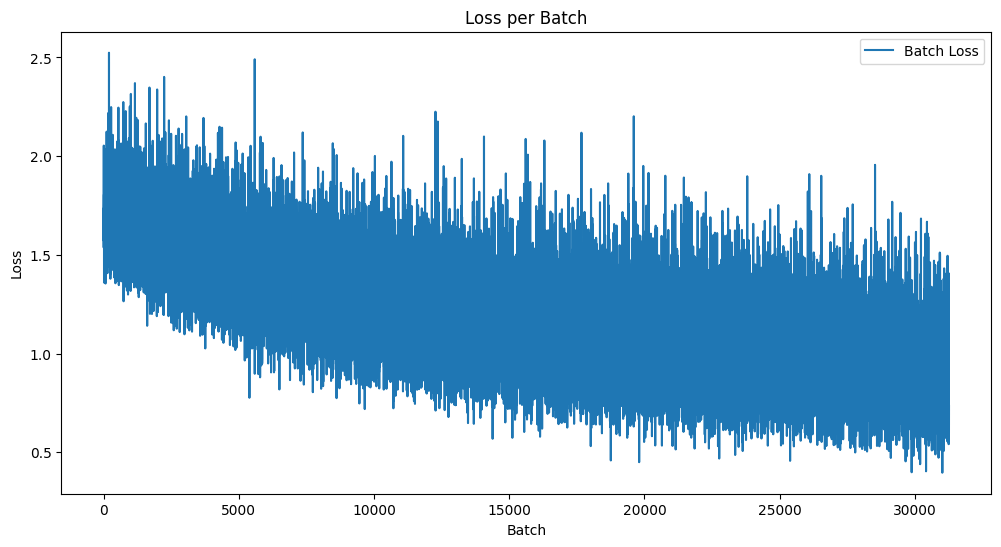

In [ ]:
# Plotting batch-wise losses
plt.figure(figsize=(12, 6))
plt.plot(batch_losses, label='Batch Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss per Batch')
plt.legend()
plt.show()

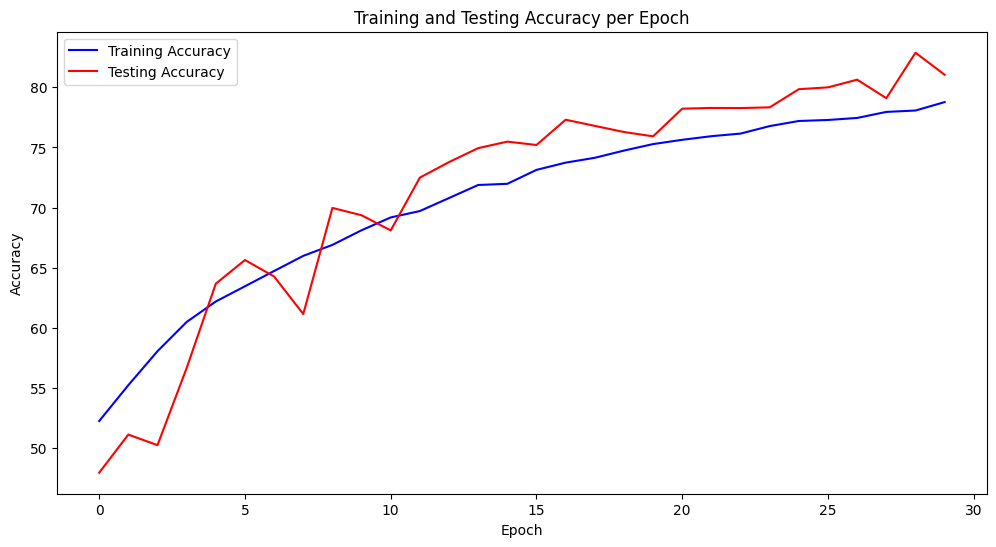

In [ ]:
# Plotting epoch-wise training and testing accuracies
plt.figure(figsize=(12, 6))
plt.plot(epoch_train_accuracies, label='Training Accuracy', color='blue')
plt.plot(epoch_test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy per Epoch')
plt.legend()
plt.show()

### Attemt 4

In [ ]:
# Assuming CustomNet and other necessary imports are defined above this code

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Initialise lists for storing losses and accuracies
epoch_losses = []
epoch_train_accuracies = []
epoch_test_accuracies = []

# Playing aroud with hyperparameters, they are defined below
learning_rate = 0.001
batch_size = 16 # reduced batch size
num_epochs = 50 # increased as we can loss was reducing and traning accuracy was increasing in the previous attempt

# Applying loaders with selected batch size, increased num_workers to 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=4)

# Start the training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    net.train()  # Set the model to training mode

    # Iterate over each batch in the training data
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimiser.zero_grad()  # Clear the gradients

        outputs = net(inputs)  # Forward pass: compute the model output
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass: compute the gradient of the loss
        optimiser.step()  # Update the model parameters

        running_loss += loss.item()  # Accumulate the training loss
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate training loss and accuracy for the epoch
    epoch_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct_train / total_train
    epoch_losses.append(epoch_loss)
    epoch_train_accuracies.append(train_accuracy)

    # Evaluate the model on the test set
    net.eval()  # Set the model to evaluation mode
    correct_test = 0
    total_test = 0

    with torch.no_grad():  # Turn off gradients for validation to save memory and computations
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    # Calculate and store the test accuracy for the epoch
    test_accuracy = 100 * correct_test / total_test
    epoch_test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}: Train Loss: {epoch_loss:.3f}, Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%')

print('Finished Training')

Epoch 1: Train Loss: 0.772, Train Acc: 75.66%, Test Acc: 79.79%
Epoch 2: Train Loss: 0.749, Train Acc: 76.46%, Test Acc: 80.42%
Epoch 3: Train Loss: 0.742, Train Acc: 76.67%, Test Acc: 77.84%
Epoch 4: Train Loss: 0.728, Train Acc: 77.35%, Test Acc: 80.43%
Epoch 5: Train Loss: 0.721, Train Acc: 77.43%, Test Acc: 80.49%
Epoch 6: Train Loss: 0.713, Train Acc: 77.63%, Test Acc: 82.32%
Epoch 7: Train Loss: 0.702, Train Acc: 77.99%, Test Acc: 80.83%
Epoch 8: Train Loss: 0.689, Train Acc: 78.35%, Test Acc: 81.75%
Epoch 9: Train Loss: 0.693, Train Acc: 78.58%, Test Acc: 78.88%
Epoch 10: Train Loss: 0.677, Train Acc: 78.73%, Test Acc: 80.86%
Epoch 11: Train Loss: 0.679, Train Acc: 78.69%, Test Acc: 82.49%
Epoch 12: Train Loss: 0.671, Train Acc: 78.72%, Test Acc: 81.97%
Epoch 13: Train Loss: 0.664, Train Acc: 79.22%, Test Acc: 82.30%
Epoch 14: Train Loss: 0.654, Train Acc: 79.63%, Test Acc: 83.44%
Epoch 15: Train Loss: 0.648, Train Acc: 79.85%, Test Acc: 82.16%
Epoch 16: Train Loss: 0.646, Train

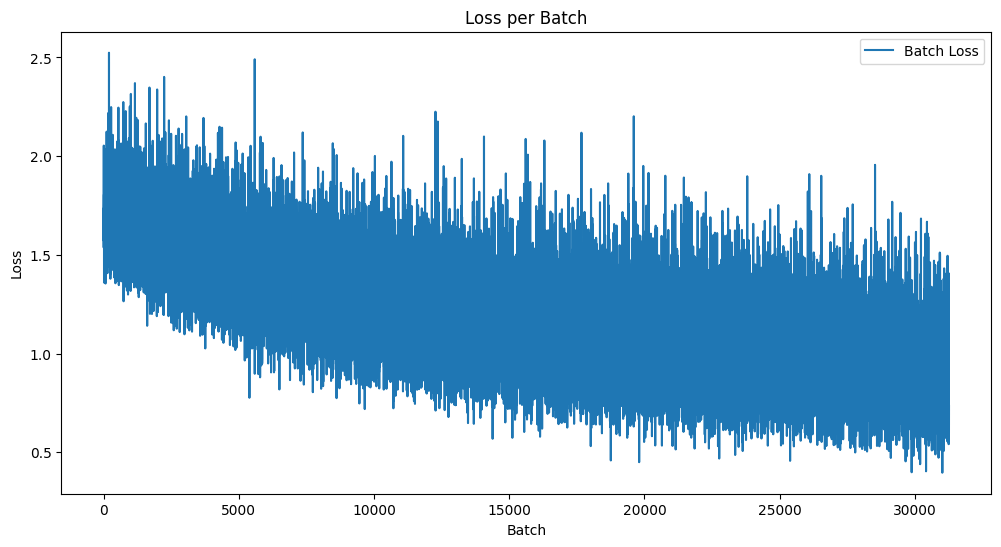

In [ ]:
# Plotting batch-wise losses
plt.figure(figsize=(12, 6))
plt.plot(batch_losses, label='Batch Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss per Batch')
plt.legend()
plt.show()

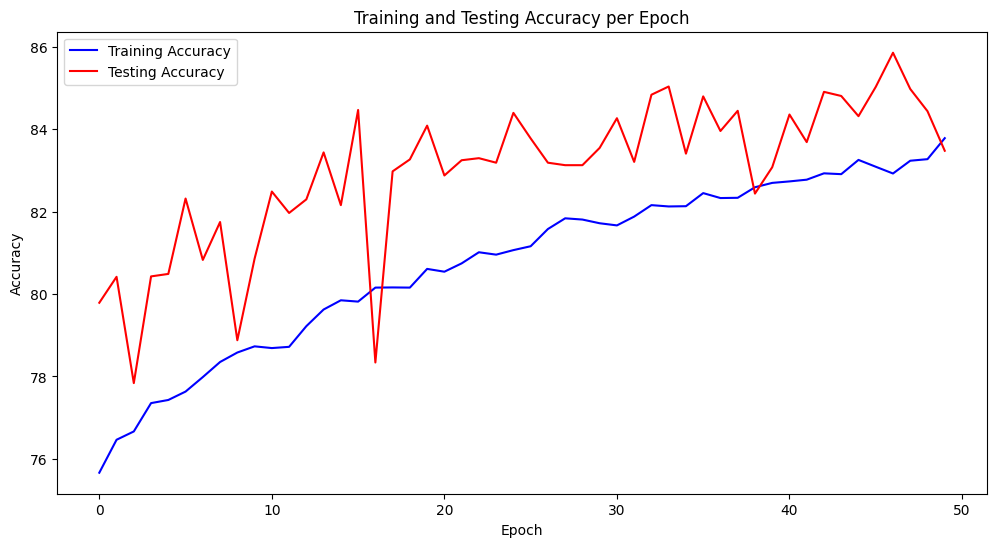

In [ ]:
# Plotting epoch-wise training and testing accuracies
plt.figure(figsize=(12, 6))
plt.plot(epoch_train_accuracies, label='Training Accuracy', color='blue')
plt.plot(epoch_test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy per Epoch')
plt.legend()
plt.show()

### Attempt 5

In [ ]:
# Assuming CustomNet and other necessary imports are defined above this code

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Initialise lists for storing losses and accuracies
epoch_losses = []
epoch_train_accuracies = []
epoch_test_accuracies = []

# Playing aroud with hyperparameters, they are defined below
learning_rate = 0.001
batch_size = 16 # reduced batch size
num_epochs = 10

# Applying loaders with selected batch size, increased num_workers to 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=4)

# Start the training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    net.train()  # Set the model to training mode

    # Iterate over each batch in the training data
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimiser.zero_grad()  # Clear the gradients

        outputs = net(inputs)  # Forward pass: compute the model output
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass: compute the gradient of the loss
        optimiser.step()  # Update the model parameters

        running_loss += loss.item()  # Accumulate the training loss
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate training loss and accuracy for the epoch
    epoch_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct_train / total_train
    epoch_losses.append(epoch_loss)
    epoch_train_accuracies.append(train_accuracy)

    # Evaluate the model on the test set
    net.eval()  # Set the model to evaluation mode
    correct_test = 0
    total_test = 0

    with torch.no_grad():  # Turn off gradients for validation to save memory and computations
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    # Calculate and store the test accuracy for the epoch
    test_accuracy = 100 * correct_test / total_test
    epoch_test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}: Train Loss: {epoch_loss:.3f}, Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%')

print('Finished Training')

Epoch 1: Train Loss: 0.525, Train Acc: 83.77%, Test Acc: 85.48%
Epoch 2: Train Loss: 0.524, Train Acc: 83.82%, Test Acc: 85.00%
Epoch 3: Train Loss: 0.523, Train Acc: 83.66%, Test Acc: 84.43%
Epoch 4: Train Loss: 0.518, Train Acc: 83.81%, Test Acc: 85.46%
Epoch 5: Train Loss: 0.522, Train Acc: 83.81%, Test Acc: 84.27%
Epoch 6: Train Loss: 0.520, Train Acc: 83.88%, Test Acc: 84.63%
Epoch 7: Train Loss: 0.516, Train Acc: 84.04%, Test Acc: 83.93%
Epoch 8: Train Loss: 0.514, Train Acc: 84.09%, Test Acc: 85.23%
Epoch 9: Train Loss: 0.508, Train Acc: 84.15%, Test Acc: 84.80%
Epoch 10: Train Loss: 0.513, Train Acc: 84.13%, Test Acc: 85.69%
Finished Training


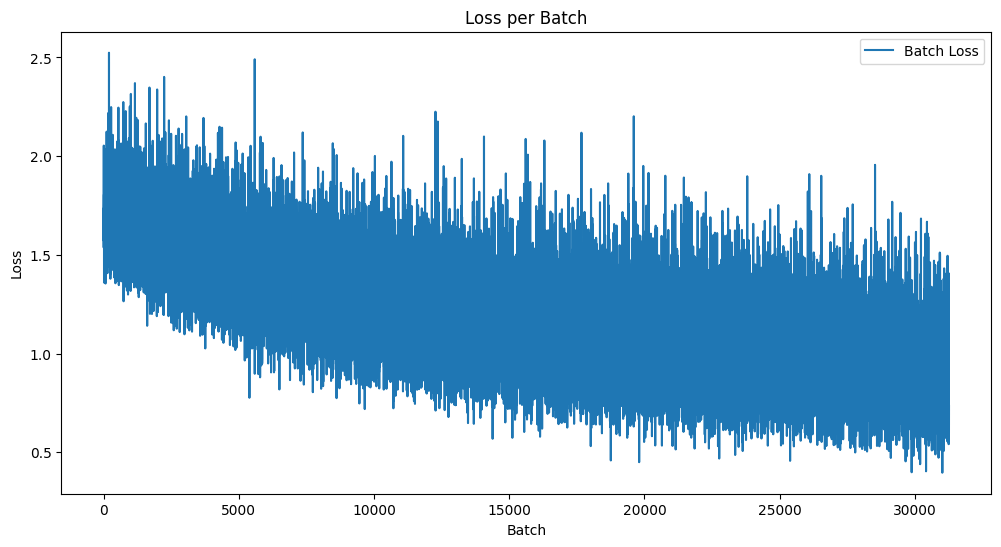

In [ ]:
# Plotting batch-wise losses
plt.figure(figsize=(12, 6))
plt.plot(batch_losses, label='Batch Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss per Batch')
plt.legend()
plt.show()

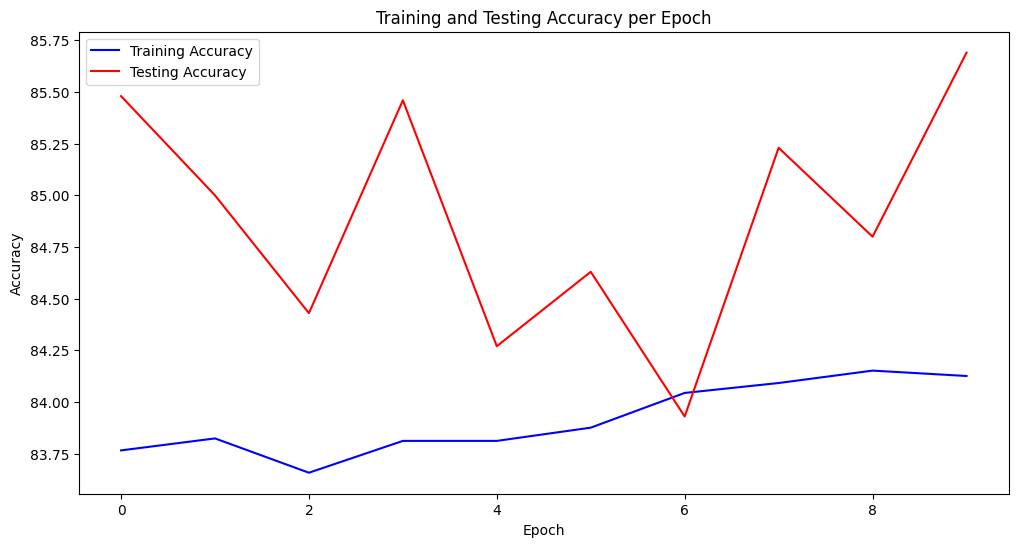

In [ ]:
# Plotting epoch-wise training and testing accuracies
plt.figure(figsize=(12, 6))
plt.plot(epoch_train_accuracies, label='Training Accuracy', color='blue')
plt.plot(epoch_test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy per Epoch')
plt.legend()
plt.show()

### **Hyperparameter Optimisation**

For attempts 4 and 5 we did more hyperparameter tuning.

We saw significant gains in model performance after meticulously experimenting with batch sizes and epochs. When the batch size was reduced to 16, the model displayed improved learning capabilities, presumably due to a more granular update path during backpropagation, which likely helped it escape local minima more successfully.

As a result, we discovered that a 10-epoch period was the optimal length for our training regimen, achieving a compromise between underfitting and overfitting. The convergence of loss minimisation and accuracy maximisation was achieved without significantly increasing computational costs or succumbing to the diminishing returns of lengthy training cycles.

This iterative approach to hyperparameter tuning resulted in an impressive test accuracy of 85.69%. This finding highlights the critical role that hyperparameter fine-tuning plays in shaping the efficacy of neural network models. The success of these revisions has given credence to the idea that even slight changes to training parameters can result in considerable improvements in a model's capacity to generalise and, therefore, its overall predictive capability.

# **Conclusion**

To summarise, designing and enhancing the architecture for image classification on the CIFAR-10 dataset has been a thorough journey of applying practical machine-learning techniques. We successfully built a neural network that not only meets the challenge of classifying complex images but also achieves a commendable testing accuracy of 85.69%, thanks to iterative design enhancements, meticulous hyperparameter tuning, and strategic incorporation of data augmentation techniques.

The integration of Intermediate Blocks, each with convolutional and fully connected layers, followed by an Output Block designed to consolidate and interpret the features, has proven critical to the success of our CustomNet architecture. These distinct architectural aspects, together with a well-thought-out training procedure that includes forward and backward passes and parameter modifications, have been critical to our success.

Our deliberate use of data augmentation has undeniably improved the model's generalisation power, allowing it to make accurate predictions even when faced with previously unknown variances in the input data. This robustness is demonstrated by the steady improvement in test performance throughout epochs, as our model learned to identify and predict with more precision.

In conclusion, we consider the successful development of a well-tuned model that not only achieves high accuracy but also opens the possibility of future advancements and applications in the field of image recognition.